In [2]:
# import all needed packages
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

### Import of the Classes Used for the Pipeline


#### Hint:
If you want to use own classes replace the imports with your own. Make sure that the basic structure and functionality is the same othewise error will occure.

In [3]:
# import own Classes needed for experimantal workbench
from Analyzer import Analyzer
from Evaluator import Evaluator
from JSONExtractor import JSONExtractor
from GraphicalExtractor import GraphicalExtractor
from Pipeline import Pipeline

## Step 1
Import your model and run the cell to make sure everything works.

In [4]:
model = LogisticRegression(max_iter=10000)

## Step 2
Import the test data and run the cell to make sure everything works.

In [5]:
data = pd.read_csv("stroke.csv", index_col=0, encoding="latin-1")
x = data.drop("stroke", axis=1)
y = data["stroke"]
oe = OrdinalEncoder()
for column in x:
    if x[column].dtype == "object":
        x[column] = oe.fit_transform(x[[column]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)


## Step 2.1 Optional
If your data is a dataframe ignore this step.
If your data is numpy data, create two lists. The first one called x_columns should contain the column names of the x_data and the y_column the name of the target column

In [5]:
x_columns = []
y_columns = []

## Step 3 Option 1
Create the configuration as Python dictionary

In [6]:
configuration = {
    "trainedState": True,
    "outputType": "*",
    "outputFileName": "experiment_workbench",
    "outputFileType": "pdf",
    "outputFilePath": "./",
    "type": "classification",
    
}

# Step 3 Option 2
Import your JSON file as configuration

In [6]:
path_to_file = "config.json"

file = open(path_to_file)

configuration = json.load(file)


# uncomment print to test if configuration is loaded correctly
# print(configuration)

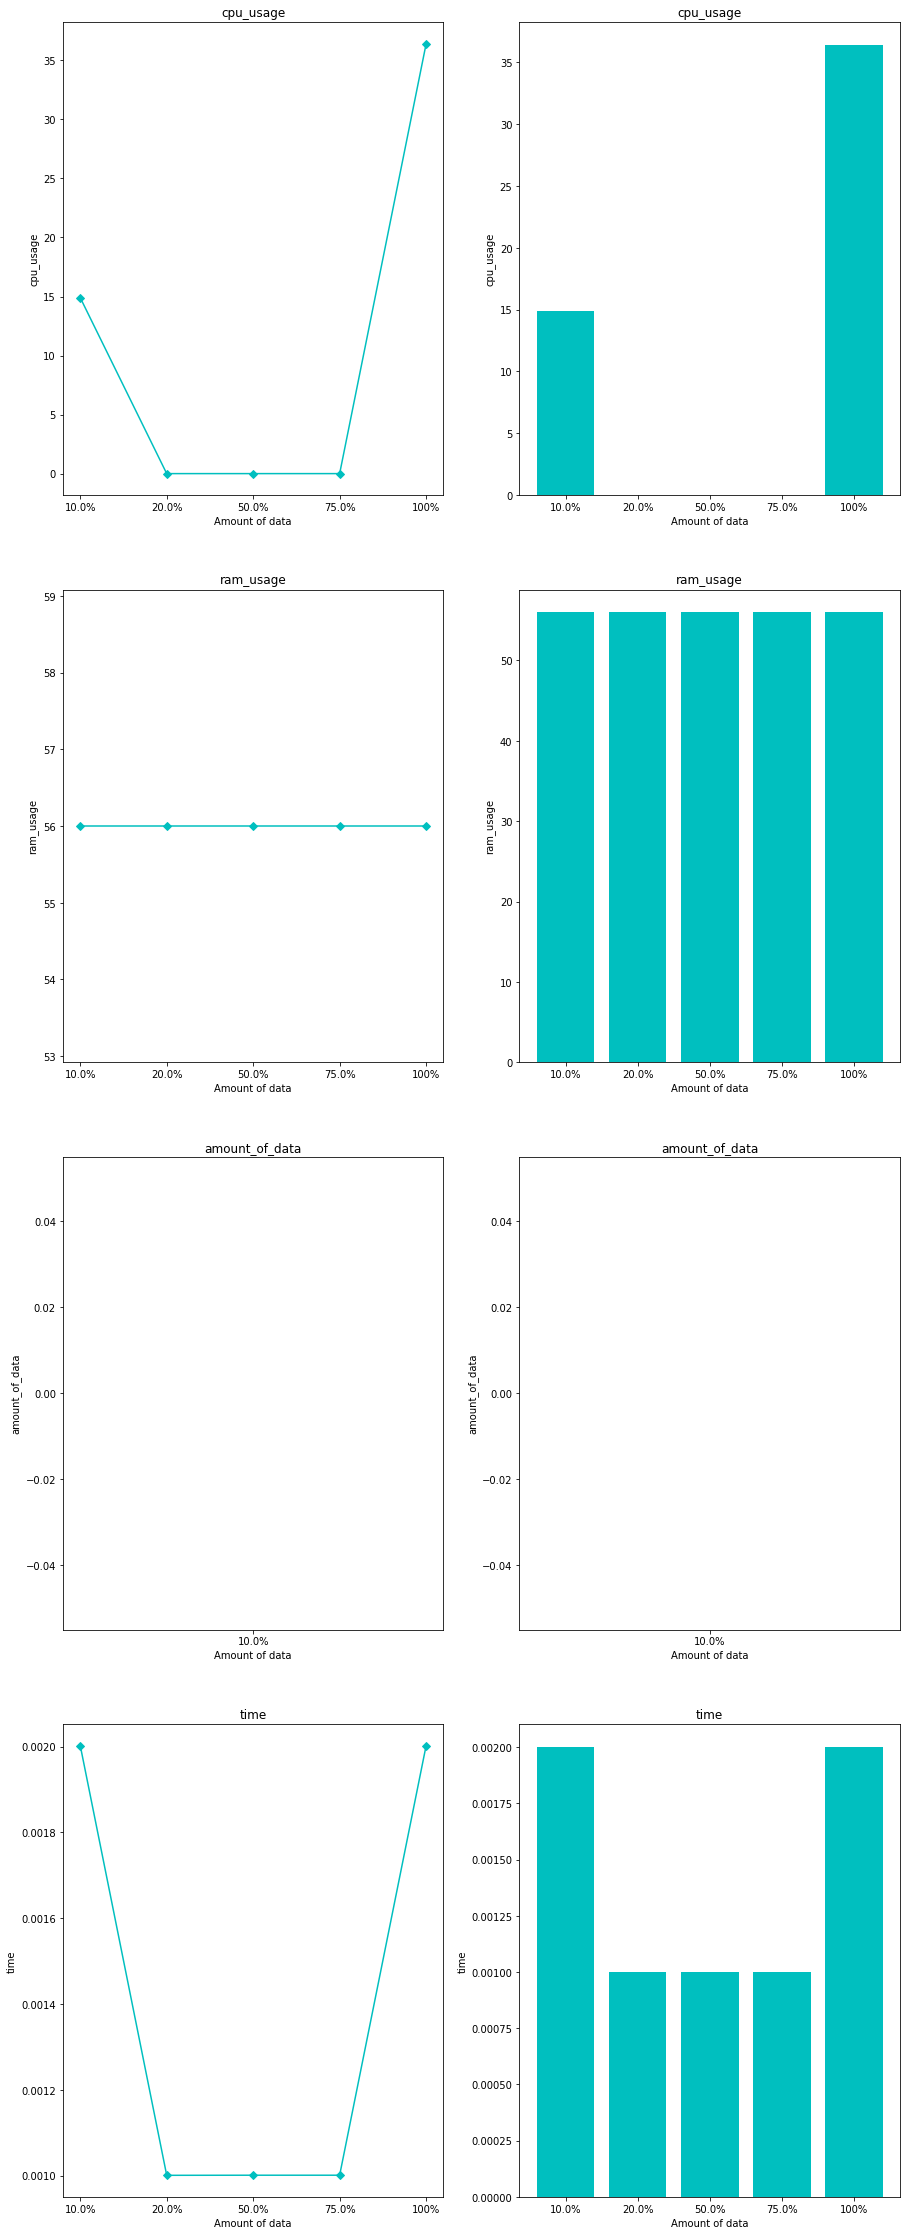

In [8]:
analyzer = Analyzer(x, y)
evaluator = Evaluator(x_test, y_test)
extractor1 = JSONExtractor()
extractor2 = GraphicalExtractor()
pipeline = Pipeline((analyzer, evaluator, extractor1, extractor2), model, configuration)
pipeline.test()